In [1]:
#=======================================
# Imports
#=======================================
import numpy as np
import matplotlib.pyplot as plt
import glob
import xarray
import datetime
import calendar
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import matplotlib
import pickle
import pandas as pd
import os
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.interpolate import NearestNDInterpolator as nn
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
#import palettable
import h5py
import scipy
import random

# Read in dictionaries (as "pickle" files) of time-height soundings for each of the CNTL simulation (100-m horizontal grid spacing) and the 50-m simulation, which uses the same exact physics as the 100-m CNTL simulation
## Dictionaries were created by stitching together time-height series at 1-min output for each initial and restart file(s) for a given simulation
## Relevant data used for analysis was extracted, but only that for cloud droplet number concentration (Nc), domain-maximum vertical velocity (wmax), and total liquid water content (LWC) are used here
## These files are available on the NCCS data portal (https://portal.nccs.nasa.gov/datashare/giss-camp2ex/)

In [2]:
sim_name_1 = 'dharma_cntl'
sim_name_2 = 'dharma_50m'

sims = [sim_name_1,sim_name_2]

In [3]:
#path = '/discover/nobackup/mwstanfo/dharma_post/soundings/'
path = '/discover/nobackup/mwstanfo/acp_camp2ex_ms_data/dharma_mean_sounding_time_height_profiles/'

all_sims_sounding_dict = {}

for sim in sims:
    tmp_sounding_dict = xarray.open_dataset(path+sim+'_sounding.nc',decode_times=False)
    all_sims_sounding_dict[sim] = tmp_sounding_dict
    #tmp_sounding_dict = pickle.load(open(path+sim+'_sounding_dict.p','rb'))
    #all_sims_sounding_dict[sim] = tmp_sounding_dict

# Plot time-height series of domain-max vertical velocity, total LWC, and domain-mean in-cloud cloud droplet number concentration (Nc) for CNTL and 50-m simulations

/gpfsm/dnb33/tdirs/batch/slurm.42957537.mwstanfo/ipykernel_30924/1332622783.py:67: UserWarning: Log scale: values of z <= 0 have been masked
  lwc_plot = axes[ii,1].contourf(tmp_time,zt*1.e-3,tmp_lwc.T,levels=lwc_levs,extend='both',cmap='turbo',norm=matplotlib.colors.LogNorm())


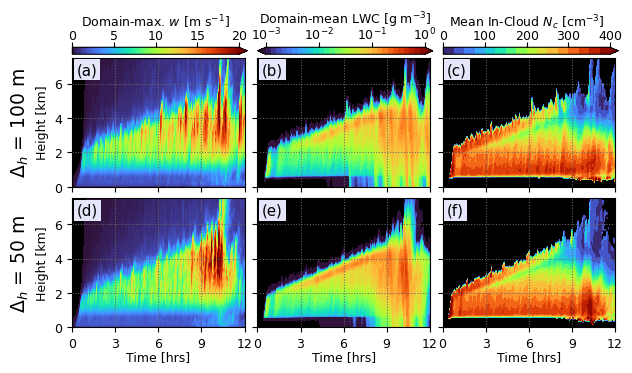

In [5]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(7,3.5))
axes_flat = np.ndarray.flatten(axes)
Fontsize=9

zt = all_sims_sounding_dict['dharma_cntl']['zt']
zw = all_sims_sounding_dict['dharma_cntl']['zw']


for ax in axes_flat:
    ax.grid(ls='dotted',lw=0.75,c='dimgrey')
    ax.tick_params(labelsize=Fontsize)
    ax.set_ylim(0,7.5)

for ax in axes_flat:
    ax.set_yticks([0,2,4,6])
    ax.set_yticklabels([])
    ax.set_xticks([0,3,6,9,12])
    ax.set_xticklabels([])
    
axes[0,0].set_yticklabels([0,2,4,6],fontsize=Fontsize)
axes[0,0].set_ylabel('Height [km]',fontsize=Fontsize)
axes[1,0].set_yticklabels([0,2,4,6],fontsize=Fontsize)
axes[1,0].set_ylabel('Height [km]',fontsize=Fontsize)

axes[1,0].set_xticklabels([0,3,6,9,12])
axes[1,1].set_xticklabels([0,3,6,9,12])
axes[1,2].set_xticklabels([0,3,6,9,12])
dum=0
axes[1,0].set_xlabel('Time [hrs]',fontsize=Fontsize,labelpad=dum)
axes[1,1].set_xlabel('Time [hrs]',fontsize=Fontsize,labelpad=dum)
axes[1,2].set_xlabel('Time [hrs]',fontsize=Fontsize,labelpad=dum)


#--------------------------------
# Max W
#--------------------------------
for ii in range(2):
    sim = sims[ii]
    tmp_time = all_sims_sounding_dict[sim]['time'].values
    #print(tmp_time)
    tmp_wmax = all_sims_sounding_dict[sim]['wmax'].values
    tmp_wmax[tmp_wmax < 0.01] = -99.
    
    w_levs = np.arange(0,20.1,0.1)

    w_plot = axes[ii,0].contourf(tmp_time,zw*1.e-3,tmp_wmax.T,levels=w_levs,extend='max',cmap='turbo')

cbar_ax = fig.add_axes([0.125,0.89, 0.25, 0.02])
cbar = fig.colorbar(w_plot, cax=cbar_ax,ticks=np.arange(0,25,5),orientation='horizontal')
cbar.ax.tick_params(labelsize=Fontsize,pad=0)
cbar.ax.set_xlabel('Domain-max. $w$ [m s$^{-1}$]',fontsize=Fontsize,labelpad=2)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

#--------------------------------
# LWC
#--------------------------------
for ii in range(2):
    sim = sims[ii]
    tmp_time = all_sims_sounding_dict[sim]['time'].values
    tmp_lwc = all_sims_sounding_dict[sim]['lwc'].values
    #tmp_clwc = all_sims_sounding_dict[sim]['clwc']
    #tmp_rwc = all_sims_sounding_dict[sim]['rwc']
    #tmp_lwc = tmp_clwc + tmp_rwc
    
    lwc_levs = 10.**np.arange(-3,0.1,0.1)
    lwc_plot = axes[ii,1].contourf(tmp_time,zt*1.e-3,tmp_lwc.T,levels=lwc_levs,extend='both',cmap='turbo',norm=matplotlib.colors.LogNorm())

cbar_ax = fig.add_axes([0.39,0.89, 0.25, 0.02])
cbar = fig.colorbar(lwc_plot, cax=cbar_ax,ticks=10.**np.arange(-3,1,1),orientation='horizontal')
dum_ticks = np.arange(-3,1,1)
new_ticks = []
for dum_tick in dum_ticks:
    new_ticks.append('10$^{'+str(int(dum_tick))+'}$')
cbar.ax.set_xticklabels(new_ticks)
cbar.ax.tick_params(labelsize=Fontsize,pad=0)
cbar.ax.set_xlabel('Domain-mean LWC [g m$^{-3}$]',fontsize=Fontsize,labelpad=2)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


#--------------------------------
# Nc_cld
#--------------------------------
for ii in range(2):
    sim = sims[ii]
    tmp_time = all_sims_sounding_dict[sim]['time'].values
    tmp_nc_cld = all_sims_sounding_dict[sim]['nc_cld'].values
    tmp_nc_cld[tmp_nc_cld < 1] = -99.
    
    nc_cld_levs = np.arange(0,425,25)
    nc_cld_plot = axes[ii,2].contourf(tmp_time,zt*1.e-3,tmp_nc_cld.T,levels=nc_cld_levs,extend='max',cmap='turbo')

cbar_ax = fig.add_axes([0.655,0.89, 0.25, 0.02])
cbar = fig.colorbar(nc_cld_plot, cax=cbar_ax,ticks=np.arange(0,500,100),orientation='horizontal')
cbar.ax.tick_params(labelsize=Fontsize,pad=0)
cbar.ax.set_xlabel('Mean In-Cloud $N_{c}$ [cm$^{-3}$]',fontsize=Fontsize,labelpad=2)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bbox=dict(facecolor='lavender', edgecolor='none', boxstyle='square,pad=0.2',alpha=1)
dum_labs = ['(a)','(b)','(c)','(d)','(e)','(f)']
dumi=0
for ax in axes_flat:
    ax.text(0.025,0.965,dum_labs[dumi],transform=ax.transAxes,fontsize=Fontsize*1.2,va='top',ha='left',bbox=bbox)
    dumi+=1
    
axes_flat[0].text(-0.3,0.5,'$\\Delta_{h}$ = 100 m',fontsize=Fontsize*1.5,rotation=90,transform=axes_flat[0].transAxes,c='k',ha='center',va='center')
axes_flat[3].text(-0.3,0.5,'$\\Delta_{h}$ = 50 m',fontsize=Fontsize*1.5,rotation=90,transform=axes_flat[3].transAxes,c='k',ha='center',va='center')


plt.subplots_adjust(hspace=0.09,wspace=0.075)

for ax in axes_flat:
    ax.set_facecolor('black')

fig_path = '/discover/nobackup/mwstanfo/figures/camp2ex_paper/'
outfile = 'fig_res_sens_test.png'
#plt.savefig(fig_path+outfile,dpi=300,bbox_inches='tight')
plt.show()
plt.close()  